# LeNet Lab
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data


In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

13


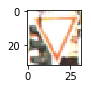

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [3]:
from sklearn.utils import shuffle
import cv2

X_train, y_train = shuffle(X_train, y_train)

def preproc(data):
    imgs = np.ndarray((data.shape[0], 32, 32, 1), dtype=np.uint8)
    for i, img in enumerate(data):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.equalizeHist(img)
        img = np.expand_dims(img, axis=2)
        imgs[i] = img
    return imgs

def norm(data):
    data = data.astype('float32')
    return 0.1 + (data - 0)*(0.9 - 0.1)/(255 - 0)

X_train = preproc(X_train)
X_test = preproc(X_test)
X_valid = preproc(X_valid)

X_train = norm(X_train)
X_test = norm(X_test)
X_valid = norm(X_valid)

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [4]:
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 256

### LeNet-5 for Traffic Sign recognition
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 43 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [5]:
from tensorflow.contrib.layers import flatten

mu = 0
sigma = 0.1
keep_prob = tf.placeholder(tf.float32)

weights = {
    'wc1': tf.Variable(tf.truncated_normal([3, 3, 1, 64], mean = mu, stddev = sigma)),
    'wc2': tf.Variable(tf.truncated_normal([3, 3, 64, 128], mean = mu, stddev = sigma)),
    'wc3': tf.Variable(tf.truncated_normal([3, 3, 128, 256], mean = mu, stddev = sigma)),
    'wc4': tf.Variable(tf.truncated_normal([3, 3, 256, 256], mean = mu, stddev = sigma)),
    'wd1': tf.Variable(tf.truncated_normal([4*4*256, 400], mean = mu, stddev = sigma)),
    'wd2': tf.Variable(tf.truncated_normal([400, 200], mean = mu, stddev = sigma)),
    'out': tf.Variable(tf.truncated_normal([200, 43], mean = mu, stddev = sigma))}

biases = {
    'bc1': tf.Variable(tf.zeros([64])),
    'bc2': tf.Variable(tf.zeros([128])),
    'bc3': tf.Variable(tf.zeros([256])),
    'bc4': tf.Variable(tf.zeros([256])),
    'bd1': tf.Variable(tf.zeros([400])),
    'bd2': tf.Variable(tf.zeros([200])),
    'out': tf.Variable(tf.zeros([43]))}

def LeNet(x):
    # Layer 1: Convolutional(32x32x1 >> 32x32x64); Activation(-); Pooling(32x32x64 >> 16x16x64) 
    conv1 = tf.nn.conv2d(x, weights['wc1'], strides=[1, 1, 1 ,1], padding='SAME') + biases['bc1']
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    # Layer 2: Convolutional(16x16x64 >> 16x16x128); Activation(-); Pooling(16x16x128 >> 8x8x128)
    conv2 = tf.nn.conv2d(conv1, weights['wc2'], strides=[1, 1, 1 ,1], padding='SAME') + biases['bc2']
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    
    # Layer 3: Convolutional(8x8x128 >> 8x8x256); Activation(-); Dropout(-)
    conv3 = tf.nn.conv2d(conv2, weights['wc3'], strides=[1, 1, 1, 1], padding='SAME') + biases['bc3']
    conv3 = tf.nn.relu(conv3)
    conv3 = tf.nn.dropout(conv3, keep_prob)
    
    # Layer 4: Convolutional(8x8x256 >> 8x8x256); Activation(-); Pooling(8x8x256 >> 4x4x256)
    conv4 = tf.nn.conv2d(conv3, weights['wc4'], strides=[1, 1, 1, 1], padding='SAME') + biases['bc4']
    conv4 = tf.nn.relu(conv4)
    conv4 = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    # conv4 = tf.nn.dropout(conv4, keep_prob)
    
    # Layer 5: Flatten(4x4x256 >> 4096); Fully Connected(4096 >> 400); Activation(-); Dropout(-)
    fc1 = flatten(conv4)
    fc1 = tf.matmul(fc1, weights['wd1']) + biases['bd1']
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # Layer 6: Fully Connected(400 >> 200); Activation(-); Dropout(-)
    fc2 = tf.matmul(fc1, weights['wd2']) + biases['bd2']
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Layer 7: Fully Connected(200 >> 43)
    logits = tf.matmul(fc2, weights['out']) + biases['out']
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [6]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [7]:
rate = 0.001
beta = 0.01

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
## Loss function using L2 Regularization
regularizer = tf.nn.l2_loss(weights['wc1']) + tf.nn.l2_loss(weights['wc2']) + tf.nn.l2_loss(weights['wd1']) + \
    tf.nn.l2_loss(weights['wd2']) + tf.nn.l2_loss(weights['out'])
loss_operation = tf.reduce_mean(loss_operation + beta * regularizer)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [8]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

Training...

EPOCH 1 ...
Training Accuracy = 0.125
Validation Accuracy = 0.138

EPOCH 2 ...
Training Accuracy = 0.452
Validation Accuracy = 0.421

EPOCH 3 ...
Training Accuracy = 0.549
Validation Accuracy = 0.519

EPOCH 4 ...
Training Accuracy = 0.667
Validation Accuracy = 0.683

EPOCH 5 ...
Training Accuracy = 0.769
Validation Accuracy = 0.780

EPOCH 6 ...
Training Accuracy = 0.823
Validation Accuracy = 0.830

EPOCH 7 ...
Training Accuracy = 0.851
Validation Accuracy = 0.866

EPOCH 8 ...
Training Accuracy = 0.886
Validation Accuracy = 0.900

EPOCH 9 ...
Training Accuracy = 0.893
Validation Accuracy = 0.919

EPOCH 10 ...
Training Accuracy = 0.909
Validation Accuracy = 0.929

EPOCH 11 ...
Training Accuracy = 0.910
Validation Accuracy = 0.936

EPOCH 12 ...
Training Accuracy = 0.916
Validation Accuracy = 0.948

EPOCH 13 ...
Training Accuracy = 0.924
Validation Accuracy = 0.957

EPOCH 14 ...
Training Accuracy = 0.924
Validation Accuracy = 0.959

EPOCH 15 ...
Training Accuracy = 0.929
Valid

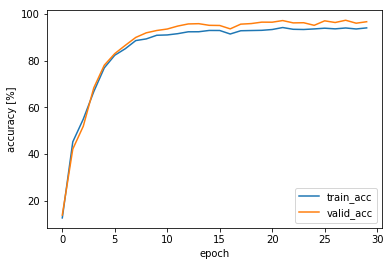

In [9]:
train_accuracies = []
valid_accuracies = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        train_accuracy = evaluate(X_test,y_test)    
        valid_accuracy = evaluate(X_valid, y_valid)
        train_accuracies.append(train_accuracy*100)
        valid_accuracies.append(valid_accuracy*100)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(valid_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")
plt.plot(train_accuracies)
plt.plot(valid_accuracies)
plt.legend(['train_acc', 'valid_acc'])
plt.ylabel('accuracy [%]')
plt.xlabel('epoch')
plt.show()

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [10]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\lenet
Test Accuracy = 0.938
